In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gamma_values = np.array([5.750,5.963,6.094,6.121,6.198,6.136,6.133,6.241,6.374
                         ,6.524,6.624,6.610,6.597,6.763,6.929,6.992,7.405,7.784])
years = np.arange(1986, 2005, 1)
# 初始条件
N1 = np.zeros_like(years, dtype=float)
N2 = np.zeros_like(years, dtype=float)
N1[0] = 740
N2[0] = 900

# 碳循环模型
for i in range(1, len(years)):
    dN1_dt = -105/740 * N1[i-1] + 102/900 * N2[i-1] + gamma_values[i-1]
    dN2_dt = 105/740 * N1[i-1] - 102/900 * N2[i-1]       
    N1[i] = N1[i-1] + dN1_dt
    N2[i] = N2[i-1] + dN2_dt

In [3]:
N1_NObuffer = (N1/2.13)[1:19]

In [4]:
N1_NObuffer

array([348.70892019, 350.07643066, 351.47370043, 352.85127816,
       354.23910055, 355.57339171, 356.89221479, 358.25147069,
       359.6583235 , 361.11568319, 362.59516617, 364.0429257 ,
       365.46678299, 366.95618434, 368.5032338 , 370.05369386,
       371.77436542, 373.62781873])

In [5]:
import numpy as np
import matplotlib.pyplot as plt

gamma_values = np.array([5.750,5.963,6.094,6.121,6.198,6.136,6.133,6.241,6.374,6.524,6.624,6.610,6.597,6.763,6.929,6.992,7.405,7.784])
years = np.arange(1986, 2005, 1)

# 初始条件
N0 = 821
N1 = np.zeros_like(years, dtype=float)
N2 = np.zeros_like(years, dtype=float)
N1[0] = 740 
N2[0] = 900 

for i in range(1, len(years)):

    z = N1[i-1]/2.13
    xi = 3.69 + 1.86e-2 * z - 1.80e-6 * z**2

    dN1_dt = -105/740 * N1[i-1] + 102/900 * (N0 + xi * (N2[i-1] - N0)) + gamma_values[i-1]
    dN2_dt = 105/740 * N1[i-1] - 102/900 * (N0 + xi * (N2[i-1] - N0))

    N1[i] = N1[i-1] + dN1_dt
    N2[i] = N2[i-1] + dN2_dt

In [6]:
N1_buffer = (N1/2.13)[1:19]

In [7]:
N1_buffer

array([386.2654774 , 379.07215625, 384.81900782, 386.42512765,
       389.38876739, 391.89163945, 394.54149645, 397.19535871,
       399.92394046, 402.71387361, 405.54821489, 408.37416247,
       411.19845888, 414.10277814, 417.07792342, 420.07912161,
       423.27524669, 426.62935219])

In [8]:
coefficients = np.polyfit(years[1:], N1_buffer, 1)
fit_line = np.poly1d(coefficients)
fit_line

poly1d([ 2.68253883e+00, -4.95086612e+03])

In [9]:
N1_ob = pd.read_csv("unc.csv")["mean"].values
N1_ob

array([315.98, 316.91, 317.64, 318.45, 318.99, 319.62, 320.04, 321.37,
       322.18, 323.05, 324.62, 325.68, 326.32, 327.46, 329.68, 330.19,
       331.13, 332.03, 333.84, 335.41, 336.84, 338.76, 340.12, 341.48,
       343.15, 344.87, 346.35, 347.61, 349.31, 351.69, 353.2 , 354.45,
       355.7 , 356.54, 357.21, 358.96, 360.97, 362.74, 363.88, 366.84,
       368.54, 369.71, 371.32, 373.45, 375.98, 377.7 ])

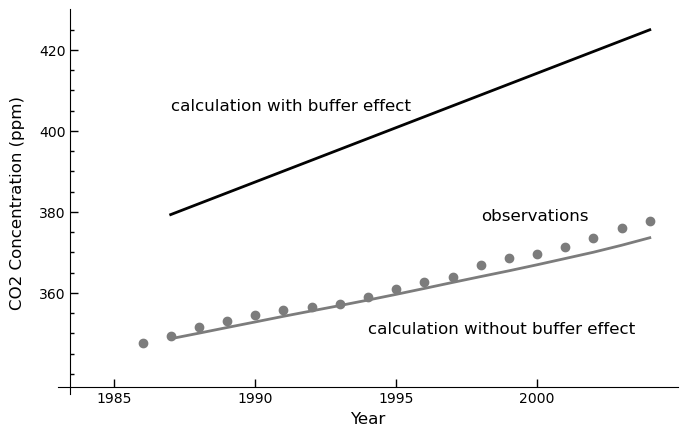

In [10]:
fig = plt.figure(figsize=(8, 5))   
ax = fig.add_subplot(1, 1, 1)
ax.plot(years[1:19], N1_NObuffer, label='Model 1', linewidth=2.0,c = "#7c7c7c")
ax.plot(years[1:19], fit_line(years[1:]), label='Model 2', linewidth=2.0,c = "#020202")
ax.plot(years[0:19], N1_ob[27:] ,'o',c = "#7c7c7c",label='Observation')
font = {'size': 12}
ax.set_xlabel('Year',fontdict=font)
ax.set_ylabel('CO2 Concentration (ppm)',labelpad=10,fontdict=font)
ax.set_xlim(1983, 2005)
ax.set_ylim(335,430)
ax.set_xticks([1985, 1990, 1995, 2000])
ax.set_yticks([360, 380, 400, 420])
ax.set_yticks(np.arange(340, 430, 5), minor=True)
ax.tick_params(which='both', direction='in', length=6, width=1)
ax.tick_params(which='minor', direction='in', length=3, width=1)
ax.text(1987, 405, 'calculation with buffer effect',fontdict=font)
ax.text(1998, 378, 'observations',fontdict=font)
ax.text(1994, 350, 'calculation without buffer effect',fontdict=font)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines.left.set_position(('axes', 0.02))
ax.spines.bottom.set_position(('axes', 0.02))
plt.show()

In [11]:
import numpy as np

start_year = 1750
end_year = 1850
start_value = 0.2 
end_value = 0.5 
years = np.arange(start_year, end_year + 1)
values = start_value + (end_value - start_value) / (end_year - start_year) * (years - start_year)

In [12]:
LUCE = pd.read_csv("global_carbon.csv")['luce'].to_numpy()[0:151]
delte = np.concatenate((values, LUCE))

In [13]:
gamma_values = pd.read_csv('global_1751_2014.csv')['C'].to_numpy()/1000

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

def seven_box_model(beta):
  
    years = np.arange(1750, 2001, 1)
    # 初始条件
    N0 = 842  
    N1 = np.zeros_like(years, dtype=float)
    N2 = np.zeros_like(years, dtype=float)
    N3 = np.zeros_like(years, dtype=float)
    N4 = np.zeros_like(years, dtype=float)
    N5 = np.zeros_like(years, dtype=float)
    N6 = np.zeros_like(years, dtype=float)
    N7 = np.zeros_like(years, dtype=float)
    N1[0] = 615  
    N2[0] = 842  
    N3[0] = 9744
    N4[0] = 26280
    N5[0] = 90000000
    N6[0] = 731
    N7[0] = 1238
    for i in range(1, len(years)):

        z = N1[i-1]/2.13
        xi = 3.69 + 1.86e-2 * z - 1.80e-6 * z**2
        f = 62*(1+(beta*math.log(z/289)))
    
        dN1_dt = -60/615 * N1[i-1] + 60/842 * (N0 + xi * (N2[i-1] - N0)) + gamma_values[i-1]-f + delte[i-1] + 0.2/90000000*N5[i-1] + 62/1238*N7[i-1]
        dN2_dt = 60/615 * N1[i-1] - 60/842 * (N0 + xi * (N2[i-1] - N0)) - 9/842*N2[i-1] + 52/9744*N3[i-1] - 43/842*N2[i-1]
        dN3_dt =  9/842*N2[i-1] - 52/9744*N3[i-1] - 162/9744*N3[i-1] + 205/26280*N4[i-1]
        dN4_dt =  162/9744*N3[i-1] - 205/26280*N4[i-1] + 43/842*N2[i-1] - 0.2/26280*N4[i-1]
        dN5_dt = 0.2/26280*N4[i-1] - 0.2/90000000*N5[i-1]
        dN6_dt = f - 62/731*N6[i-1]-2*delte[i-1]
        dN7_dt = 62/731*N6[i-1] - 62/1238*N7[i-1] + delte[i-1]
    
        N1[i] = N1[i-1] + dN1_dt
        N2[i] = N2[i-1] + dN2_dt
        N3[i] = N3[i-1] + dN3_dt
        N4[i] = N4[i-1] + dN4_dt
        N5[i] = N5[i-1] + dN5_dt
        N6[i] = N6[i-1] + dN6_dt
        N7[i] = N7[i-1] + dN7_dt
    return N1

In [17]:
N1_038 = seven_box_model(0.38)/2.13
N1_050 = seven_box_model(0.5)/2.13

In [18]:
ice_ture = pd.read_csv("icecores.csv")['ic'].values
ice_ture

array([277. , 277.2, 277.6, 278. , 278.6, 279.3, 280.1, 280.8, 281.6,
       282.3, 282.9, 283.4, 283.8, 284. , 284.2, 284.3, 284.4, 284.5,
       284.6, 284.8, 285.2, 285.7, 286.3, 287.2, 288.2, 289.4, 290.8,
       292.3, 293.7, 295.2, 296.7, 298.2, 299.9, 301.5, 303.2, 304.9,
       306.5, 308. , 309.3, 310.5, 312. , 314.1, 316.9, 320.5, 324.7,
       329.4])

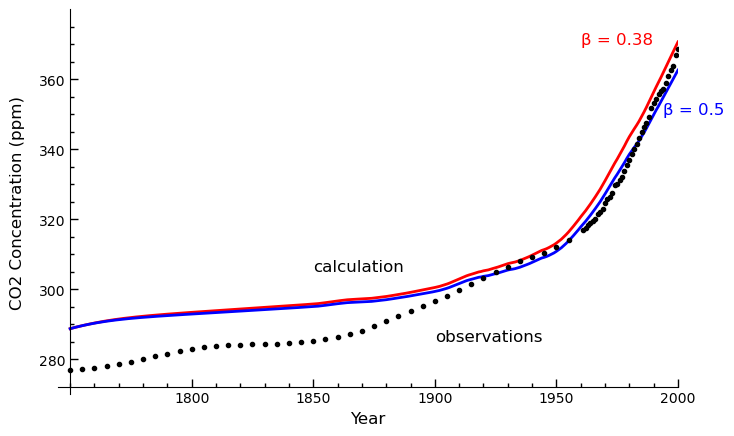

In [19]:
fig = plt.figure(figsize=(8, 5))   
ax = fig.add_subplot(1, 1, 1)
years = np.arange(1750, 2001, 1)
ax.plot(years[0:251], N1_038, linewidth=2.0,c = "red")
ax.plot(years[0:251], N1_050,  linewidth=2.0,c = "blue")
ax.plot(years[211:251], N1_ob[1:41] ,'o',c = "black",markersize=3)
ax.plot(years[0:210:5], ice_ture[0:42] ,'o',c = "black",markersize=3)
font = {'size': 12}
ax.set_xlabel('Year',fontdict=font)
ax.set_ylabel('CO2 Concentration (ppm)',labelpad=10,fontdict=font)
ax.set_xlim(1745, 2000)
ax.set_ylim(270,380)
ax.set_xticks([1800, 1850, 1900,1950, 2000])
ax.set_yticks([280, 300, 320, 340,360])
ax.set_yticks(np.arange(280, 380, 5), minor=True)
ax.set_xticks(np.arange(1750, 2000,10), minor=True)
ax.tick_params(which='both', direction='in', length=6, width=1)
ax.tick_params(which='minor', direction='in', length=3, width=1)
ax.text(1850, 305, 'calculation',fontdict=font)
ax.text(1900, 285, 'observations',fontdict=font)
ax.text(1960, 370, 'β = 0.38',fontdict=font,color='red')
ax.text(1994, 350, 'β = 0.5',fontdict=font,color='blue')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines.left.set_position(('axes', 0.02))
ax.spines.bottom.set_position(('axes', 0.02))
plt.show()